In [47]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
caminho = '/content/drive/MyDrive/SP_poluicao_dados.csv'
dados = pd.read_csv(caminho)

dados = dados.drop(columns = ['Unnamed: 0', 'ID'])

dados.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


In [48]:
dados['DataHora'] = pd.to_datetime(dados['Data'] + ' ' + dados['Hora'])
print(dados.dtypes)
print(dados.isnull().sum())

Data                object
Hora                object
Estacao             object
Codigo              object
Poluente            object
Valor              float64
Unidade             object
Tipo                object
DataHora    datetime64[ns]
dtype: object
Data        0
Hora        0
Estacao     0
Codigo      0
Poluente    0
Valor       0
Unidade     0
Tipo        0
DataHora    0
dtype: int64


Tipos de poluentes que existem em SP:  ['MP10' 'O3' 'NO2' 'CO' 'MP2.5' 'SO2' 'FMC' 'PTS' 'NO']
Poluente
MP10     2883216
O3       2647308
NO2      2176814
MP2.5    1224587
CO        899056
SO2       796305
NO        347840
FMC         3679
PTS         1710
Name: count, dtype: int64


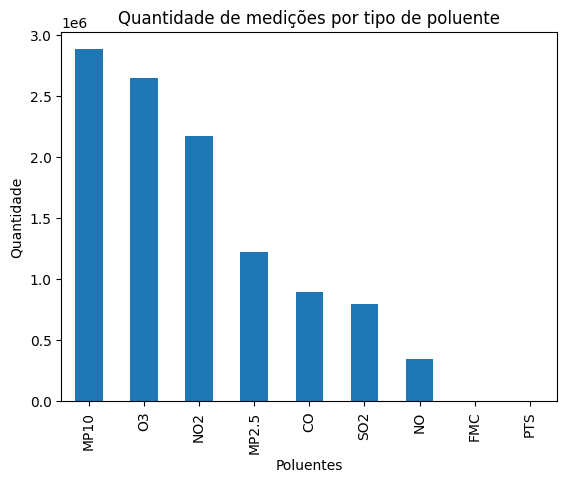

<Figure size 640x480 with 0 Axes>

In [49]:
#Tipos de Poluentes em SP!
tipos_poluentes = dados['Poluente'].unique()
print('Tipos de poluentes que existem em SP: ', tipos_poluentes)
contagem_poluentes = (dados['Poluente']).value_counts()
print(contagem_poluentes)
contagem_poluentes.plot(kind = 'bar')
plt.title('Quantidade de medições por tipo de poluente')
plt.xlabel('Poluentes')
plt.ylabel('Quantidade')
plt.show()
#Vemos que o poluente que mais aparece seria o MP10 por ser um poluente feito por veículos!
plt.savefig('poluentes.png', dpi=300, bbox_inches='tight')

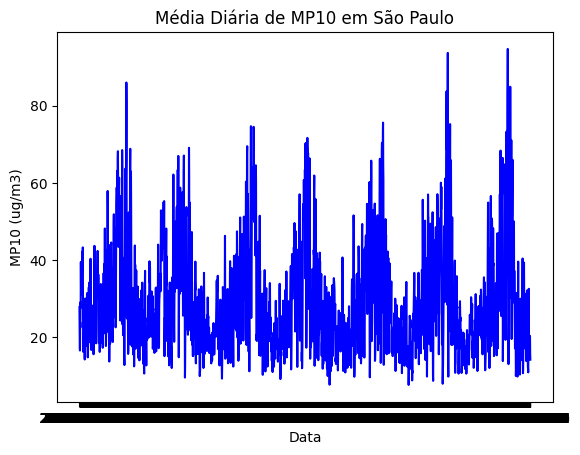

<Figure size 640x480 with 0 Axes>

In [50]:
#Realizando o cálculo de média diário do MP10
mp10 = (dados['Poluente'] == 'MP10')
dados_mp10 = dados[mp10]
dados['Data'] = dados['DataHora'].dt.date
media_diaria = dados_mp10.groupby('Data')['Valor'].mean().reset_index()
media_diaria.rename(columns={'Valor': 'MediaMP10'}, inplace=True)
plt.plot(media_diaria['Data'], media_diaria['MediaMP10'], color='blue')
plt.title('Média Diária de MP10 em São Paulo')
plt.xlabel('Data')
plt.ylabel('MP10 (ug/m3)')
plt.show()
plt.savefig('grafico_mp10.png', dpi=300, bbox_inches='tight')

    Ano  MediaMP10
0  2015  31.505148
1  2016  29.963564
2  2017  28.603411
3  2018  28.305785
4  2019  28.417689
5  2020  28.654026
6  2021  28.568678


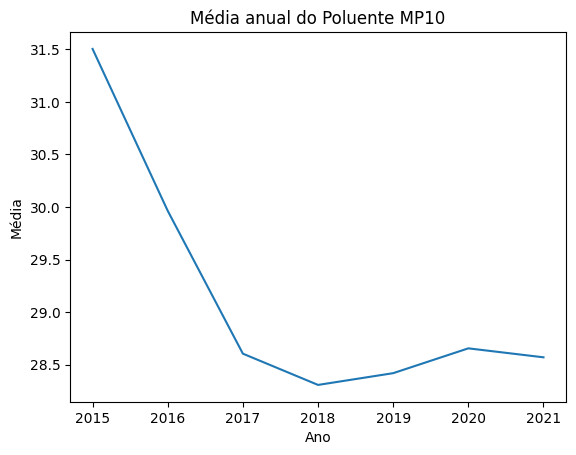

<Figure size 640x480 with 0 Axes>

In [51]:
media_diaria['Data'] = pd.to_datetime(media_diaria['Data'])
media_diaria['Ano'] = media_diaria['Data'].dt.year
media_anual = media_diaria.groupby('Ano')['MediaMP10'].mean().reset_index()
print(media_anual)
media_anual.columns = ['Ano', 'MediaMP10']
plt.plot(media_anual['Ano'], media_anual['MediaMP10'])
plt.title('Média anual do Poluente MP10')
plt.xlabel('Ano')
plt.ylabel('Média')
plt.show()
plt.savefig('grafico_mp10_anual.png', dpi=300, bbox_inches='tight')

    Ano  Contagem
0  2015   1375695
1  2016   1481620
2  2017   1926384
3  2018   1630037
4  2019   1604763
5  2020   1501835
6  2021   1460181


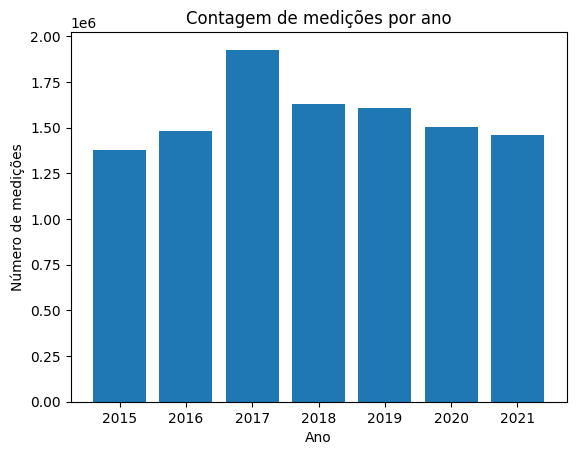

<Figure size 640x480 with 0 Axes>

In [52]:
#Realizando a contagem de medições por mês
dados['Mês'] = dados['DataHora'].dt.month
dados['Ano'] = dados['DataHora'].dt.year
medicoes_anuais = dados.groupby('Ano').size().reset_index(name='Contagem')
print(medicoes_anuais)
plt.bar(medicoes_anuais['Ano'],medicoes_anuais['Contagem'])
plt.title('Contagem de medições por ano')
plt.xlabel('Ano')
plt.ylabel('Número de medições')
plt.show()
plt.savefig('contagem.png', dpi=300, bbox_inches='tight')